In [2]:
%load_ext autoreload
%autoreload 2

import os
os.environ["WANDB_DISABLED"] = "true"

import sys
sys.path = [
    p for p in sys.path
    if p not in ['/home/jxm3/research/prompting/imodelsX', '/home/jxm3/research/prompting/tree-prompt']
]
sys.path.append('/home/jxm3/research/retrieval/inversion')

In [10]:
import aliases

# inv_trainer = aliases.load_trainer_from_alias("openai_msmarco__msl128__100epoch")
corr_experiment, corr_trainer = aliases.load_experiment_and_trainer_from_alias("gtr_nq__msl32_beta__correct")
inv_trainer = corr_trainer.inversion_trainer
# corr_trainer.precompute_hypotheses()
corr_trainer.model.eval()
print()

loading alias gtr_nq__msl32_beta__correct from /home/jxm3/research/retrieval/inversion/saves/47d9c149a8e827d0609abbeefdfd89ac...
> checkpoint: /home/jxm3/research/retrieval/inversion/saves/47d9c149a8e827d0609abbeefdfd89ac/checkpoint-558000
set dataset to nq
loading alias dpr_nq__msl32_beta from /home/jxm3/research/retrieval/inversion/saves/db66b9c01b644541fedbdcc59c53a285/ebb31d91810c4b62d2b55b5382e8c7ea...
Set num workers to 8
Overwriting max sequence length from 32 to 32
> checkpoint: /home/jxm3/research/retrieval/inversion/saves/db66b9c01b644541fedbdcc59c53a285/ebb31d91810c4b62d2b55b5382e8c7ea/checkpoint-999744


/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Loading datasets with TOKENIZERS_PARALLELISM = True


[nltk_data] Downloading package wordnet to /home/jxm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jxm3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jxm3/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Renaming keys {'embedding_transform.2.weight', 'embedding_transform.2.bias'} for backward compatibility.
================ Begin trainer sanity check ================
	Input to encode -> Twas brillig, and the slithy toves, Did gyre and gimble in the wabe, All mimsy were the borogoves, And the mome raths outgrabe.
	Decoded output shape ->  torch.Size([1, 33])
	Decoded output -> The mlbies wase wyst bograge; And the sliths and toms wy
================ End trainer sanity check ================
Froze 342572160 params from model type <class 'models.inversion.InversionModel'>


[nltk_data] Downloading package wordnet to /home/jxm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jxm3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jxm3/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Renaming keys {'embedding_transform.2.weight', 'embedding_transform.2.bias'} for backward compatibility.
================ Begin trainer sanity check ================
	Input to encode -> Twas brillig, and the slithy toves, Did gyre and gimble in the wabe, All mimsy were the borogoves, And the mome raths outgrabe.
	Decoded output shape ->  torch.Size([1, 33])
	Decoded output -> The slithe and the tobogbes were mly; It wis grabbse tiring
================ End trainer sanity check ================



In [4]:
corr_trainer.return_best_hypothesis = False
corr_trainer.args.per_device_eval_batch_size = 128
corr_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
corr_trainer.num_gen_recursive_steps = 5
metrics = corr_trainer.evaluate(
    eval_dataset=corr_trainer.eval_dataset["nq"].select(range(500)),
    metric_key_prefix="eval_nq",
)
print(metrics)

generating from val:   0%|                                                                                                              | 0/4 [00:00<?, ?it/s]

CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}


generating from val:  25%|█████████████████████████▌                                                                            | 1/4 [00:03<00:11,  3.89s/it]

CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}


generating from val:  50%|███████████████████████████████████████████████████                                                   | 2/4 [00:07<00:07,  3.72s/it]

CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}


generating from val:  75%|████████████████████████████████████████████████████████████████████████████▌                         | 3/4 [00:11<00:03,  3.67s/it]

CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}
CE.generate: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 0, 'max_length': 32, 'num_return_sequences': 1}


[pred] to the character of the sutures of the skull, which, like those of the infant skull, are relatively smooth and untornuous. Indeed
[true] to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



[pred] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'
[true] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



[pred] same rights as straight people, while 15% agreed that they should be protected from workplace discrimination. Additionally, 13% disagreed. 69% of H-
[true] the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
{'eval_nq_loss': 0.6404249668121338, 'eval_nq_pred_num_tokens': 31.0, 'eval_nq_true_num_tokens': 32.0, 

In [7]:
corr_trainer.eval_dataset["nq"][0].keys() # making sure embeddings aren't precomputed

dict_keys(['input_ids', 'attention_mask', 'labels', 'length', 'embedder_input_ids', 'embedder_attention_mask'])

In [13]:
corr_trainer.inversion_trainer.model.noise_level = 1e-3
corr_trainer.return_best_hypothesis = False
corr_trainer.args.per_device_eval_batch_size = 128
corr_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
corr_trainer.num_gen_recursive_steps = 1
metrics = corr_trainer.evaluate(
    eval_dataset=corr_trainer.eval_dataset["nq"].select(range(500)),
    metric_key_prefix="eval_nq",
)
print(metrics)

[pred] to the character of the sutures of the skull, which are relatively smooth and untornate of infant skulls. In fact, unlike those
[true] to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



[pred] individual from Australia, to win a Winter Olympic gold medal, and was part of the Southern Hemisphere relay team which also won the short track
[true] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



[pred] the same rights as straight people, and 5% disagreed with the idea that workplace discrimination should be protected. Additionally, 15% agreed with LGBT rights and
[true] the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
{'eval_nq_loss': 0.7328670024871826, 'eval_nq_pred_num_tokens': 31.0, 'eval_nq_true_num_t

In [12]:
corr_trainer.inversion_trainer.model.noise_level = 1e-3
corr_trainer.return_best_hypothesis = False
corr_trainer.args.per_device_eval_batch_size = 128
corr_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
corr_trainer.num_gen_recursive_steps = 5
metrics = corr_trainer.evaluate(
    eval_dataset=corr_trainer.eval_dataset["nq"].select(range(500)),
    metric_key_prefix="eval_nq",
)
print(metrics)

[pred] to the character of the sutures of the skull, which, like the infant skull, are relatively smooth and untornuous. Rather,
[true] to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



[pred] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'
[true] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



[pred] the same rights as straight people, while 15% disagreed. Additionally, 9% agreed that they should be protected from workplace discrimination. 63% of H
[true] the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
{'eval_nq_loss': 0.7234241366386414, 'eval_nq_pred_num_tokens': 31.0, 'eval_nq_true_num_tokens': 32.0, 'eval_

In [16]:
all_retrieval_metrics = []

for noise_level in [0, 1e-3, 1e-2, 1e-1, 1]:
    corr_trainer.inversion_trainer.model.noise_level = noise_level
    corr_trainer.return_best_hypothesis = False
    corr_trainer.args.per_device_eval_batch_size = 128
    corr_trainer.gen_kwargs = {
        "early_stopping": False,
        "num_beams": 1,
        "do_sample": False,
        "no_repeat_ngram_size": 0,
    }
    corr_trainer.num_gen_recursive_steps = 10
    metrics = corr_trainer.evaluate(
        eval_dataset=corr_trainer.eval_dataset["nq"].select(range(500)),
        metric_key_prefix="eval_nq",
    )
    metrics["noise_level"] = noise_level
    all_retrieval_metrics.append(metrics)
    print(metrics)


[pred] to the character of the sutures of the skull, which, like those of the infant skull, are relatively smooth and untornuous. However
[true] to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



[pred] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'
[true] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



[pred] the same rights as straight people, while 15% disagreed. Additionally, 13% agreed that they should be protected from workplace discrimination. 69% of H
[true] the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
{'eval_nq_loss': 0.6404249668121338, 'eval_nq_pred_num_tokens': 31.0, 'eval_nq_true_num_tokens': 32

[pred] to the character of the sutures of the skull, which, like those of the infant skull, are relatively smooth and untortuous. fact
[true] to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



[pred] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team which won Australia'
[true] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



[pred] the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
[true] the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
{'eval_nq_loss': 0.7306284308433533, 'eval_nq_pred_num_tokens': 31.0, 'eval_nq_true_num_tokens': 32.0

[pred] to those of the skeletons of a child, somewhat smooth, teel-like skull. Nevertheless, the following 
[true] to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



[pred] Winter Olympics as part of Team Winter Olympics to win the short track gold medal; this meant that Windisch was a Southern Australian (Australian) recipient
[true] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



[pred] the same rights as straight people, while 85% agreed that workers should be protected and excluded. On May 18, a party voted to partially close gay
[true] the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
{'eval_nq_loss': 2.759197235107422, 'eval_nq_pred_num_tokens': 31.0, 'eval_nq_true_num_tokens': 32.0, 'eval_nq_token_set

[pred] Little bump on my neck "My little bump on my neck"—born. Other than "My little bump on my neck", S-born, 
[true] to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



[pred] ---Young to watch television ---Young to watch television, aka ---Young to watch television, aka ---and 
[true] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



[pred] time to write about something I'm about to do. As many readers are excluded from answering their questions, they borrowed space for assignment and what their 
[true] the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
{'eval_nq_loss': 9.409228324890137, 'eval_nq_pred_num_tokens': 31.0, 'eval_nq_true_num_tokens': 32.0, 'eval_nq_token_set_precision': 0.09773832763023034, 'e

[pred] There to make there make no other possible make of there. There to make make make make make hear make "There will be Derek Derek" initial setup Ceci
[true] to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



[pred] There is a local no longer existing presence in the "old" Yelène Lucas. To Hos titlu, Yel titlu being first to make
[true] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



[pred] Propellant firsts local under Ev for its "national to" a. But in actual Ev for its formation, first conform conform conform
[true] the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
{'eval_nq_loss': 9.174431800842285, 'eval_nq_pred_num_tokens': 31.0, 'eval_nq_true_num_tokens': 32.0, 'eval_nq_token_set_precision': 0.11

In [48]:
import pandas as pd
import glob
import json

def load_results_from_folder(name: str) -> pd.DataFrame:
    filenames = glob.glob(os.path.join(name, "*__32.json"))
    data = []
    for f in filenames:
        _, model, dataset, noise_level, __ = os.path.basename(f).split("__")
        noise_level = float(noise_level)
        metrics = json.load(open(f, 'r'))
        d = {}
        for k, _d in metrics.items():
            d.update(_d)
        d.update({
            "model": model,
            "dataset": dataset,
            "noise_level": noise_level,
        })
        data.append(d)
    print(f"loaded {len(data)} results")
    return pd.DataFrame(data)

defense_results = load_results_from_folder("/home/jxm3/research/retrieval/inversion/results_defense")

loaded 80 results


In [49]:
defense_results

,NDCG@1,NDCG@3,NDCG@5,NDCG@10,NDCG@100,NDCG@1000,MAP@1,MAP@3,MAP@5,MAP@10,...,Recall@1000,P@1,P@3,P@5,P@10,P@100,P@1000,model,dataset,noise_level
0,0.17333,0.21356,0.23174,0.24720,0.29752,0.32588,0.15639,0.19635,0.20866,0.21543,...,0.80156,0.17333,0.09222,0.06800,0.03967,0.00670,0.00092,sentence_transformers_gtr_t5_base,scifact,0.000
1,0.15718,0.24788,0.28228,0.32432,0.38179,0.39935,0.15718,0.22499,0.24398,0.26143,...,0.94666,0.15718,0.10479,0.07966,0.05277,0.00804,0.00095,sentence_transformers_gtr_t5_base,arguana,0.010
2,0.16074,0.24836,0.28597,0.32873,0.38643,0.40368,0.16074,0.22570,0.24647,0.26437,...,0.95235,0.16074,0.10479,0.08122,0.05370,0.00812,0.00095,sentence_transformers_gtr_t5_base,arguana,0.001
3,0.15647,0.24856,0.28448,0.32781,0.38476,0.40212,0.15647,0.22475,0.24445,0.26251,...,0.95235,0.15647,0.10597,0.08122,0.05391,0.00811,0.00095,sentence_transformers_gtr_t5_base,arguana,0.000
4,0.00000,0.00000,0.00031,0.00054,0.00211,0.01363,0.00000,0.00000,0.00018,0.00028,...,0.11238,0.00000,0.00000,0.00014,0.00014,0.00010,0.00011,sentence_transformers_gtr_t5_base,arguana,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.14200,0.12656,0.11917,0.11486,0.14232,0.16242,0.03629,0.05631,0.06278,0.07055,...,0.32563,0.14200,0.10333,0.08320,0.05620,0.01150,0.00169,sentence_transformers_gtr_t5_base,bioasq,0.000
76,0.14200,0.12266,0.11410,0.11328,0.13907,0.15859,0.03830,0.05489,0.06147,0.06925,...,0.30905,0.14200,0.09867,0.07720,0.05560,0.01112,0.00165,sentence_transformers_gtr_t5_base,bioasq,0.010
77,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,sentence_transformers_gtr_t5_base,bioasq,1.000
78,0.14200,0.12656,0.11946,0.11508,0.14226,0.16229,0.03629,0.05634,0.06287,0.07069,...,0.32471,0.14200,0.10333,0.08360,0.05640,0.01148,0.00168,sentence_transformers_gtr_t5_base,bioasq,0.001


In [128]:
len([
    ####### public datasets #######
    "arguana",
    "climate-fever",
    "cqadupstack",
    "dbpedia-entity",
    "fever",
    "fiqa",
    "hotpotqa",
    "msmarco",
    "nfcorpus",
    "nq",
    "quora",
    "scidocs",
    "scifact",
    "trec-covid",
    "webis-touche2020",
    ####### private datasets #######
    "signal1m",
    "trec-news",
    "robust04",
    "bioasq",
])

19

In [126]:
defense_results["dataset"].value_counts()

dataset
scifact             5
arguana             5
climate-fever       5
dbpedia-entity      5
fiqa                5
nfcorpus            5
nq                  5
quora               5
msmarco             5
scidocs             5
trec-covid          5
webis-touche2020    5
trec-news           5
signal1m            5
robust04            5
bioasq              5
Name: count, dtype: int64

In [137]:
print(defense_results[["noise_level", "dataset", "NDCG@10"]].pivot(index="noise_level", columns="dataset").to_latex(float_format="{:.3f}".format))

\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
 & \multicolumn{16}{r}{NDCG@10} \\
dataset & arguana & bioasq & climate-fever & dbpedia-entity & fiqa & msmarco & nfcorpus & nq & quora & robust04 & scidocs & scifact & signal1m & trec-covid & trec-news & webis-touche2020 \\
noise_level &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
0.000000 & 0.328 & 0.115 & 0.136 & 0.306 & 0.208 & 0.647 & 0.239 & 0.306 & 0.879 & 0.205 & 0.095 & 0.247 & 0.261 & 0.376 & 0.245 & 0.233 \\
0.001000 & 0.329 & 0.115 & 0.135 & 0.307 & 0.208 & 0.647 & 0.239 & 0.306 & 0.879 & 0.204 & 0.096 & 0.246 & 0.261 & 0.381 & 0.246 & 0.233 \\
0.010000 & 0.324 & 0.113 & 0.132 & 0.301 & 0.205 & 0.633 & 0.234 & 0.298 & 0.875 & 0.192 & 0.092 & 0.235 & 0.259 & 0.378 & 0.234 & 0.225 \\
0.100000 & 0.005 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.017 & 0.000 & 0.003 & 0.000 & 0.002 & 0.006 & 0.001 & 0.005 & 0.001 & 0.000 \\
1.000000 & 0.001 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.008 & 0.000 & 0.000 & 0.000 & 0.000 & 

In [55]:
agg_defense_results = defense_results.groupby("noise_level")["NDCG@10"].mean()
agg_defense_results

noise_level
0.000    0.301615
0.001    0.301932
0.010    0.295611
0.100    0.002450
1.000    0.000682
Name: NDCG@10, dtype: float64

In [56]:
retrieval_results = pd.DataFrame(all_retrieval_metrics)

In [73]:
retrieval_results[["noise_level", "eval_nq_exact_match"]]

,noise_level,eval_nq_exact_match
0,0.000,0.488
1,0.001,0.314
2,0.010,0.000
3,0.100,0.000
4,1.000,0.000


In [80]:
full_df = retrieval_results.join(agg_defense_results, on='noise_level')
full_df.to_parquet("defense_results.parquet")

In [142]:
print(full_df[["noise_level", "NDCG@10", "eval_nq_bleu_score"]].to_latex(float_format="{:.4f}".format))

\begin{tabular}{lrrr}
\toprule
 & noise_level & NDCG@10 & eval_nq_bleu_score \\
\midrule
0 & 0.0000 & 0.3016 & 80.3725 \\
1 & 0.0010 & 0.3019 & 72.3470 \\
2 & 0.0100 & 0.2956 & 10.3344 \\
3 & 0.1000 & 0.0024 & 0.1476 \\
4 & 1.0000 & 0.0007 & 0.0797 \\
\bottomrule
\end{tabular}



/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


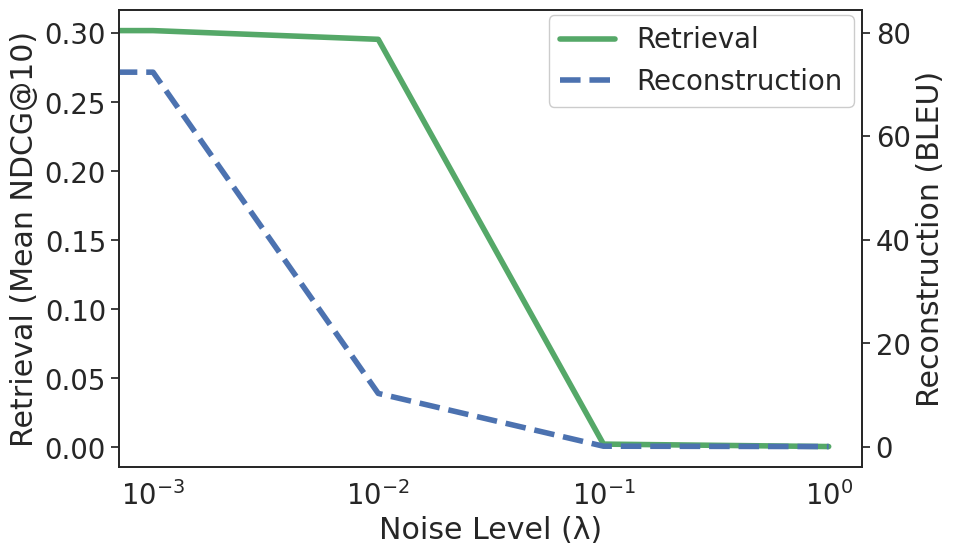

In [120]:
# full_df.plot(x='noise_level', y=['NDCG@10', 'eval_nq_bleu_score'])

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", font_scale=1.8)

plt.figure(figsize=(10, 6))
plt.xscale('log')

ax1 = sns.lineplot(data=full_df, x="noise_level", y="NDCG@10", color="g", linewidth=4, label="Retrieval", legend=False)
ax2 = ax1.twinx()
ax1.set_ylabel("Retrieval (Mean NDCG@10)")
ax1.set_xlabel("Noise Level (λ)")
ax2 = sns.lineplot(data=full_df, x="noise_level", y="eval_nq_bleu_score", ax=ax2, linewidth=4, label="Reconstruction", legend=False)
ax2.set_ylabel("Reconstruction (BLEU)")
ax2.lines[0].set_linestyle("--")


ax1.figure.legend(bbox_to_anchor=(.89, .96), framealpha=1.0)
plt.tight_layout()
plt.savefig("defense_tradeoff.pdf", dpi=300)